In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
with sqlite3.connect("db.areceber.sqlite3") as conn:
    df_pmr_giro = pd.read_sql_query("SELECT * FROM pmr_giro;", conn)
    print(df_pmr_giro)

      id        data        pmr       giro    atraso
0      1  2025-06-30  26.780230  13.629458  0.222461
1      2  2025-07-01  27.137082  13.450230  0.219884
2      3  2025-07-02  27.629156  13.210682  0.229448
3      4  2025-07-03  27.248020  13.395469  0.226971
4      6  2025-07-04  27.500671  13.272403  0.235232
..   ...         ...        ...        ...       ...
129  131  2025-12-29  19.769764  18.462537  0.261557
130  132  2025-12-30  19.478630  18.738484  0.233733
131  133  2025-12-31  19.186199  19.024091  0.236794
132  134  2026-01-02  19.480425  18.736757  0.267480
133  135  2026-01-05  19.624818  18.598899  0.298510

[134 rows x 5 columns]


In [3]:
with sqlite3.connect("db.areceber.sqlite3") as conn:
    df_saldos = pd.read_sql_query("SELECT * FROM saldos;", conn)
    print(df_saldos)

      id        DATA  REC_VENCIDOS  REC_NVENCIDOS  FATURAMENTO
0      1  2025-06-30     156238.97      546081.88   9572252.18
1      2  2025-07-01     156798.59      556299.54   9591334.18
2      3  2025-07-02     166672.00      559733.34   9596310.11
3      4  2025-07-03     162749.91      554301.68   9605242.11
4      6  2025-07-04     170181.84      553281.68   9602099.61
..   ...         ...           ...            ...          ...
129  131  2025-12-29     148000.67      417844.77  10446942.50
130  132  2025-12-30     130912.77      429183.47  10495354.50
131  133  2025-12-31     130644.34      421076.63  10495990.00
132  134  2026-01-02     149734.75      410063.96  10488812.50
133  135  2026-01-05     167961.56      394705.09  10464980.20

[134 rows x 5 columns]


In [4]:
df_pmr_giro['data'] = pd.to_datetime(df_pmr_giro['data'])
df_saldos['DATA'] = pd.to_datetime(df_saldos['DATA'])

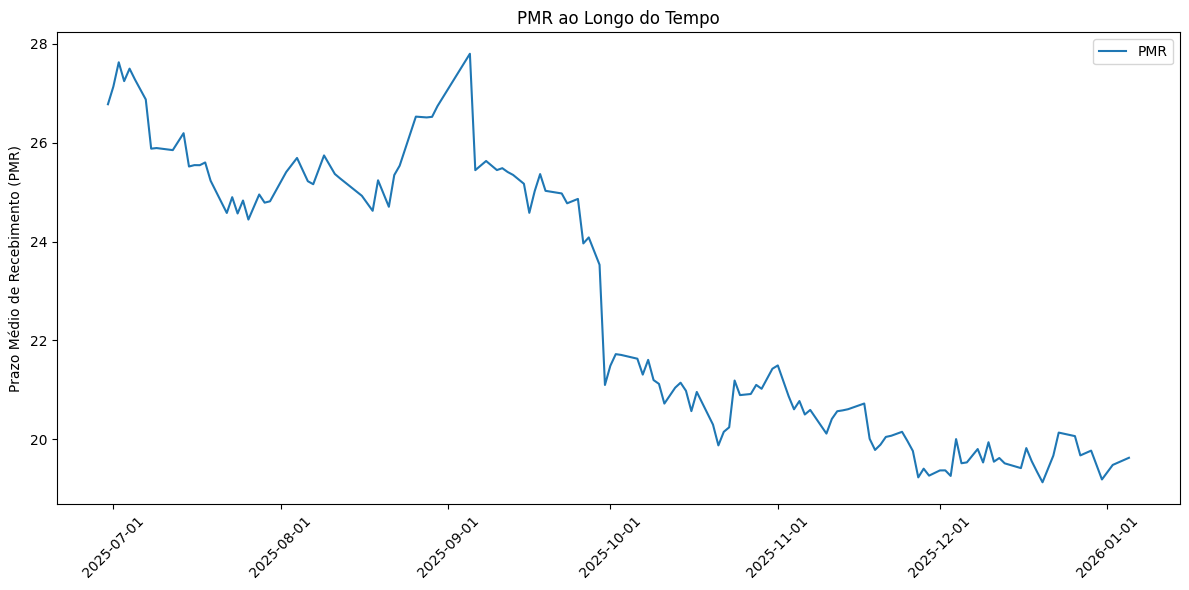

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_pmr_giro['data'], df_pmr_giro['pmr'], label='PMR')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # Localizador automático
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato da data
# Rotacionar labels para melhor visualização
plt.title("PMR ao Longo do Tempo")
plt.ylabel("Prazo Médio de Recebimento (PMR)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()